# Traing AI model on raw image.

In [2]:
import cv2
import matplotlib.pyplot as plt


In [3]:
cat_img = cv2.imread('P:/Pi OpenCV  programming/CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)

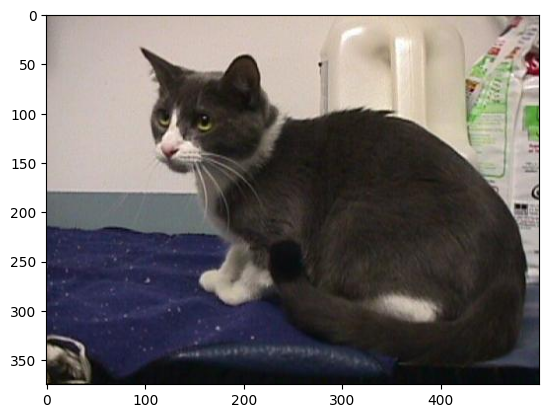

In [4]:
plt.imshow(cat_img)

In [5]:
cat_img.shape

(375, 500, 3)

In [6]:
dog_img = cv2.imread('P:/Pi OpenCV  programming/CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)

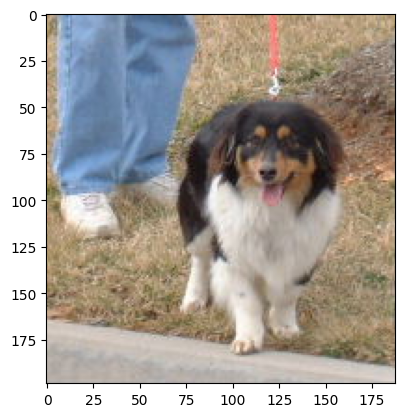

In [7]:
plt.imshow(dog_img)

In [8]:
dog_img.shape

(199, 188, 3)

In [9]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator


In [11]:
image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,  # Corrected typo here
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


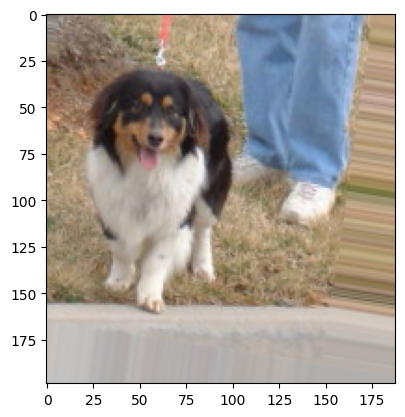

In [15]:
plt.imshow(image_gen.random_transform(dog_img))

In [16]:
P:/Pi OpenCV  programming/CATS_DOGS/CATS_DOGS/trainimage_gen.flow_from_directory('')

Found 18743 images belonging to 2 classes.


In [17]:
# creat the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D  

In [25]:
input_shape=(150, 150, 3)

In [23]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

# drop out helps over fitting by randomly turning off some neurons
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# create image training generation object for both training and testing, choose batch size
batch_size = 16

train_datagen = image_gen.flow_from_directory('P:/Pi OpenCV  programming/CATS_DOGS/CATS_DOGS/train', 
target_size = input_shape[:2],
batch_size = batch_size,
class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [27]:
# create image training generation object for both training and testing, choose batch size
batch_size = 16

test_datagen = image_gen.flow_from_directory('P:/Pi OpenCV  programming/CATS_DOGS/CATS_DOGS/test', 
target_size = input_shape[:2],
batch_size = batch_size,
class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [28]:
# defines what image belongs to which class
train_datagen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
results = model.fit(
    train_datagen, 
    epochs=1, 
    steps_per_epoch=150, 
    validation_data=test_datagen, 
    validation_steps=12
)

c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 373ms/step - accuracy: 0.5028 - loss: 0.7161 - val_accuracy: 0.5260 - val_loss: 0.6906


In [40]:
model.save('my_model.h5')  # HDF5 format


results.history['acc']

In [37]:
results.history['accuracy']

[0.5116666555404663]

In [42]:
from keras.models import load_model
new_model = load_model('my_model.h5')

In [47]:
dog_file = 'P:/Pi OpenCV  programming/CATS_DOGS/CATS_DOGS/train/DOG/1005.jpg'

from keras.preprocessing import image

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)


In [48]:
dog_img.shape

(150, 150, 3)

In [49]:
# the network will think that the image 150 by 150 is batch of one image so have to expand
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [50]:
# all the image value to be between 0 and 1
dog_img = dog_img/255.0


model.predict(dog_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([[0.48901746]], dtype=float32)

In [51]:
model.predict_classes(dog_img)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

## Deep Learning and CNN Assessment Solution


In [53]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 465s 18us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 64s 14us/step


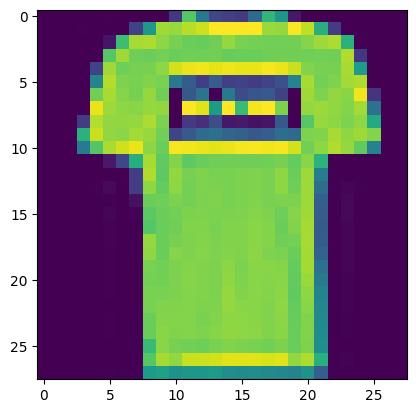

In [54]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])

In [56]:
y_train[1]

0

In [57]:
# normalizing x train and x test
x_train = x_train/255
x_test = x_test/255

In [58]:
# include 4 dimensional single channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [59]:
# convet y_train and y_test to be one-hot encoded for categorical analysis by Keras
from keras.utils import to_categorical

y_train 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [60]:
y_cat_train =to_categorical(y_train)

y_cat_test = to_categorical(y_test)

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size= (4, 4), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# train and fit the model
model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8067 - loss: 0.5422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8947 - loss: 0.2862
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9141 - loss: 0.2375
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9255 - loss: 0.2053
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9328 - loss: 0.1808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9403 - loss: 0.1617
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9482 - loss: 0.1469
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9503 - loss: 0.1359
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9570 - loss: 0.1209
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9594 - loss: 0.1129


In [70]:
# evaluate our model
model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.3396


[0.3162655234336853, 0.9042999744415283]

In [71]:
model.metrics_names

['loss', 'compile_metrics']

In [73]:
# perfrom prediction
from sklearn.metrics import classification_report

predictions = model.predict(x_test)

print(classification_report(y_test, predictions.argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.87      0.84      1000
           3       0.90      0.90      0.90      1000
           4       0.88      0.79      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

